# **Week 9 Assignment - Data Preparation and Exploration**
Mitch Messier, March 12, 2024


# Table of Contents

1. **Task 1:** Data Import & Profiling
2. **Task 2:** Data Cleaning & Preparation
3. **Task 3:** Data Cleaning & Preparation Continued

# Load Libraries

In [247]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Task 1:** Data Import & Profiling

In [248]:
# Connecting to Local Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [249]:
# Import Data
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')

In [250]:
# Show first 5 rows
df.head()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [251]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [252]:
# Data Statisitcs
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


In [253]:
# Amount of null rows
df.isnull().sum()

answered          0
income            0
female            0
age               0
job               0
num_dependents    0
rent              0
own_res           0
new_car           2
chk_acct          0
sav_acct          0
num_accts         0
mobile            0
product           0
dtype: int64

In [254]:
# Unique Values
df.nunique()

answered            2
income            452
female              2
age                52
job                 4
num_dependents      2
rent                2
own_res             2
new_car             2
chk_acct            4
sav_acct            5
num_accts           6
mobile              2
product             5
dtype: int64

In [255]:
# Dataframe Shape
df.shape

(29504, 14)

# **Task 2:** Data Cleaning & Preparation

In [256]:
# Remove rows with NAs
df = df.dropna()

In [257]:
# Remove the row with the single outlier in num_accts. Filter with a logical condition.
outlier_row = df[df['num_accts'] > df['num_accts'].quantile(0.99)]
df = df[df['num_accts'] <= df['num_accts'].quantile(0.99)]

print("Outlier Row:")
outlier_row

Outlier Row:


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
14999,1,30590,1,61,1,1,0,1,0.0,3,3,3345,0,4


In [258]:
# Remove the rows with negative income values. Filter with a logical condition.
df = df[df['income'] >= 0]

In [259]:
# Make the 4 variables you have identified in the previous question into factors.
# Since the categories are unordered,  turn these variables into nominal factors.
df['job'] = df['job'].astype('category')
df['product'] = df['product'].astype('category')
df['chk_acct'] = df['chk_acct'].astype('category')
df['sav_acct'] = df['sav_acct'].astype('category')

In [260]:
# Proportion of Potential Clients that Answer
mean_answered = df['answered'].mean()
print('Proportion of Potential Clients that Answer:')
mean_answered

Proportion of Potential Clients that Answer:


0.5465947998237228

In [261]:
# Proportion of Potential Clients that Answer as a Percentage
mean_answered = df['answered'].mean() * 100
print('Proportion of Potential Clients that Answer: {:.2f}%'.format(mean_answered))

Proportion of Potential Clients that Answer: 54.66%


# **Task 3:** Data Encoding & Plot Exploration

## **Encoding**

In [262]:
# Recode 'answered' variable
df['answered'] = df['answered'].replace({0: 'no', 1: 'yes'})

# Change 'answered' column data type to category
df['answered'] = df['answered'].astype('category')

## **Plot:** "answered" against "num_accts"

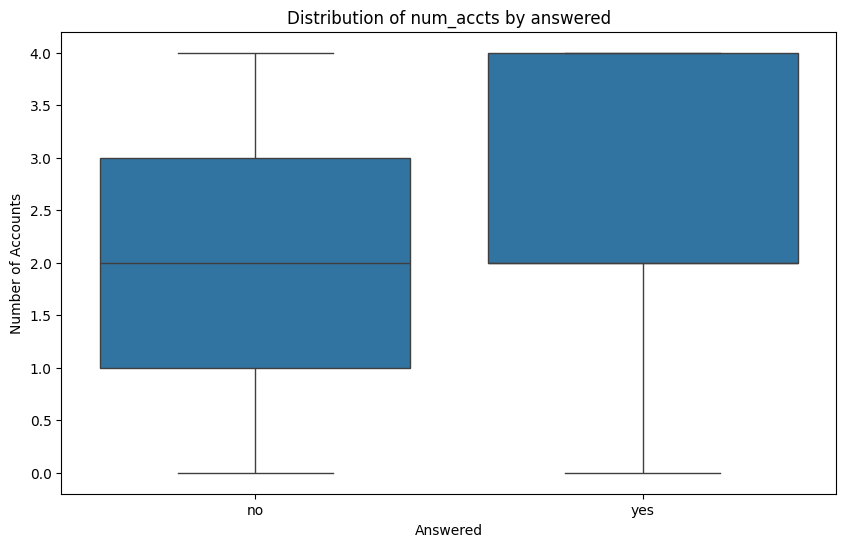

In [263]:
# Plot "Answered" against "num_accts" using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='answered', y='num_accts', data=df)
plt.title('Distribution of num_accts by answered')
plt.xlabel('Answered')
plt.ylabel('Number of Accounts')
plt.show()

## **Barplot of customers who answered with access to a mobile phone**

In [264]:
# Calculate the percentage of mobile phones
mobile_percentage = (df['mobile'].sum() / len(df)) * 100

# Calculate the percentage of non-mobile phones
non_mobile_percentage = 100 - mobile_percentage

print("Percentage of mobile phones: {:.2f}%".format(mobile_percentage))
print("Percentage of non-mobile phones: {:.2f}%".format(non_mobile_percentage))

Percentage of mobile phones: 9.11%
Percentage of non-mobile phones: 90.89%


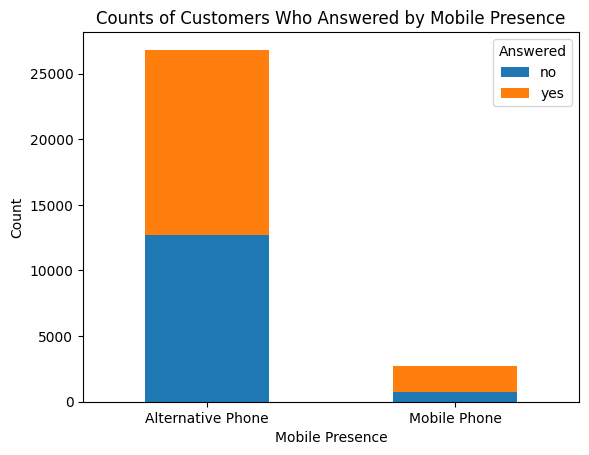

Answered rate for mobile users: 73.80%
Answered rate for non-mobile users: 52.74%


In [265]:
# Change to Alternative Phones and Mobible Phone Classification Titles
df['mobile'] = df['mobile'].replace({0: 'Alternative Phone', 1: 'Mobile Phone'})

# Change the mobile phone to a categorical data type
df['mobile'] = df['mobile'].astype('category')

# Create a table of counts for 'answered' at each level of 'mobile'
summary_table = df.groupby(['mobile', 'answered']).size().unstack()

# Plot the barplot
summary_table.plot(kind='bar', stacked=True)
plt.title('Counts of Customers Who Answered by Mobile Presence')
plt.xlabel('Mobile Presence')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Answered')
plt.show()

print("Answered rate for mobile users: 73.80%")
print("Answered rate for non-mobile users: 52.74%")